[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/MSML_602/blob/main/HW1/Homework2_PandasSQL_DATA602__121124586_Khetan.ipynb)

# **HOMEWORK 2: PANDAS and SQL (TOTAL 80)**
## **DUE: *SEPTEMBER 26, 2024 @ 11:59 PM***

---------------------
#### **DATASET DESCRIPTION**

The [NCEI/WDS Global Significant Volcanic Eruptions Database](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ngdc.mgg.hazards:G10147) is a very comprehensive collection of +600 volcanic eruptions dating from 4360 BC to the present. Due to the nature of this assignment, we will be dealing with relatively newer volcanoes (in which some are still obviously still older than anyone on Earth currently). Each eruption in the database is classified as significant if it meets one or more criteria, such as causing fatalities, incurring **damage on property** (**+$1 million**), reaching a **Volcanic Explosivity Index (VEI)** of **6 or higher**, generating a tsunami, or being linked to a significant earthquake. The VEI is a scale that measures the explosiveness of volcanic eruptions, providing insight into the magnitude and potential consequences of the eruptions. The database includes detailed information on the location, type of volcano, last known eruption, VEI, casualties, property damage, and much more.
![volcano](https://wikitravel.org/upload/shared//9/99/Volcano_de_Fuego_Banner.jpg)

#### **Objective of the Assignment:**


We will proceed directly to exploring these volcanic datasets, with the aim of enhancing our proficiency in Pandas and SQL.

For your reference, the [Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html) will be an invaluable resource. Additionally, we have provided several helpful links to assist you throughout this process. Please proceed with caution to avoid any potential pitf

---------------------

### **DO NOT REMOVE ANY PART OF ANY OF THE QUESTIONS OR YOU LOSE CREDIT**
### *No Hardcoding either*  
### **REMEMBER TO SHOW ALL CODE OUTPUT (NO CREDIT OTHERWISE)**

### **Part 1: Maintenance  (25 POINTS TOTAL)**

First, in this section, we will focus on the initial steps of the process.

As is standard practice in Python programming, it is best to import necessary modules at the beginning of your script before writing any additional code. This approach ensures that all required libraries are available from the start.

In [1]:
# Make sure these code blocks run properly and that you have properly installed the appropriate modules required.
import pandas as pd
import requests
# import other libraries here

# Don't remove this
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

As you may have noticed, there is an additional library, apart from Pandas, called "[requests](https://requests.readthedocs.io/en/latest/)."

**The requests library enables you to send HTTP requests to a server, retrieve content, and process it with ease.**  It is particularly user-friendly for beginners venturing into web scraping, which is crucial for collecting and constructing datasets. Additionally, we recommend exploring [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/), , a complementary library that can be used alongside requests for more efficient web scraping.

* As shown below, sometimes specific websites require specific headers in order to process a request to access the data.

* To check if a request was processed successfully, use the [status_code](https://requests.readthedocs.io/en/latest/api/) function to see if the process returned 200.

In [2]:
# API URL and headers in case request gets denied.
api_url = "https://www.ngdc.noaa.gov/hazel/hazard-service/api/v1/volcanoes"

headers = {
    'accept': '*/*'
}

#### **TASK 1.0: Webscraping (5 points)**

To develop our web scraper, we need to **initiate a GET request** a GET request using the relevant information provided above.

This specific NOAA dataset API returns data in JSON format when a request is made. The JSON data is structured in a particular format, so we will extract the necessary information solely from the field named "items" to construct a DataFrame.

**After successfully scraping the data, name the resulting DataFrame** ***df***

**Subsequently, save this DataFrame to a CSV file named volcanoes.csv.**

**This process should only need to be executed once.**


In [3]:
response = requests.get(api_url, headers=headers)
print(response.status_code)

200


In [4]:
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data['items'])
    df.to_csv('volcanoes.csv', index=False)
    print("Data saved to volcanoes.csv")
    print(df.shape)
else:
    print("Request failed with status code:", response.status_code)

Data saved to volcanoes.csv
(200, 43)


#### **TASK 1.1: 1-Liner Overview (3 points)**
To gain an understanding of the dataset's structure, we need to examine some fundamental characteristics of the DataFrame. We need to get an idea of what this dataset is going to look. In order to do that, let's take a look at some of the most [basic things](https://dataanalytics.buffalostate.edu/pandas-cheat-sheet) our dataframe has.


***CAN'T USE LOOPS. DO NOT DISPLAY THE DATAFRAME, JUST YOUR CODE OUTPUT HERE.***

**1.1.1:** *In one line of code and **using only one function**, show how many **total datapoints and features** there are in the dataframe **together**.*

In [5]:
print(f'total datapoints = {df.shape[0]} || total features = {df.shape[1]}')

total datapoints = 200 || total features = 43


**1.1.2:** *In one line of code, list the **names** of all the **features** in the dataframe.*

In [6]:
print(list(df.columns))

['id', 'year', 'month', 'day', 'tsunamiEventId', 'earthquakeEventId', 'volcanoLocationId', 'volcanoLocationNewNum', 'volcanoLocationNum', 'name', 'location', 'country', 'latitude', 'longitude', 'elevation', 'morphology', 'agent', 'deathsTotal', 'deathsAmountOrderTotal', 'damageAmountOrderTotal', 'significant', 'publish', 'eruption', 'status', 'timeErupt', 'vei', 'deathsAmountOrder', 'damageAmountOrder', 'housesDestroyedAmountOrderTotal', 'deaths', 'injuries', 'injuriesAmountOrder', 'injuriesTotal', 'injuriesAmountOrderTotal', 'housesDestroyedAmountOrder', 'housesDestroyed', 'housesDestroyedTotal', 'missingAmountOrder', 'missingAmountOrderTotal', 'missing', 'missingTotal', 'damageMillionsDollars', 'damageMillionsDollarsTotal']


We won't be using some of the data because there is a lot of missing data.

**1.1.3:** *In one line of code, create a **new dataframe** called **new_df** that **contains all** the features of the **old** dataframe **except the following**:*

volcanoLocationNum, location, latitude, longitude, agent, significant,	publish,	eruption,	status, timeErupt, damageAmountOrder, damageAmountOrderTotal, housesDestroyedAmountOrder,	housesDestroyedAmountOrderTotal, housesDestroyed,	housesDestroyedTotal,	missingAmountOrder,	missingAmountOrderTotal,	missing,	missingTotal, damageMillionsDollars, damageMillionsDollarsTotal, injuries, injuriesAmountOrder, injuriesTotal, injuriesAmountOrderTotal, deathsAmountOrderTotal, and deathsAmountOrder.



In [7]:
new_df = df.drop(columns=[
    'volcanoLocationNum', 'location', 'latitude', 'longitude', 'agent',
    'significant', 'publish', 'eruption', 'status', 'timeErupt', 'damageAmountOrder',
    'damageAmountOrderTotal', 'housesDestroyedAmountOrder', 'housesDestroyedAmountOrderTotal',
    'housesDestroyed', 'housesDestroyedTotal', 'missingAmountOrder', 'missingAmountOrderTotal', 'missing',
    'missingTotal', 'damageMillionsDollars', 'damageMillionsDollarsTotal', 'injuries', 'injuriesAmountOrder',
    'injuriesTotal', 'injuriesAmountOrderTotal', 'deathsAmountOrderTotal',  'deathsAmountOrder'])
new_df

,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths
0,1,1169,2.0,4.0,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN
1,2,1329,7.0,NaN,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,1.0,NaN
2,3,1883,3.0,NaN,NaN,NaN,30301,233010,Karthala,Comoros,2361,Shield volcano,NaN,2.0,NaN
3,4,1888,3.0,13.0,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN
4,5,1850,NaN,NaN,NaN,NaN,50214,252140,Rabaul,Papua New Guinea,688,Pyroclastic shield,NaN,2.0,NaN
5,6,1832,11.0,1.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN
6,7,1977,1.0,10.0,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN
7,8,787,NaN,NaN,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,3.0,NaN
8,9,1779,8.0,8.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,2.0,NaN
9,10,1302,NaN,NaN,NaN,NaN,10103,211030,Ischia,Italy,789,Complex volcano,NaN,NaN,NaN


#### **TASK 1.2: 1 Liner Shenaniganz (7 points)**

We're going to tidy up the **new dataframe** a little more with some more advanced 1 liner code.

**Read the directions carefully and code your answer with only one line of code.**

**For this section, keep the method of display that is already in the box. Write your code as indicated.**

***YOU CAN'T USE ONE LINE LOOPS OR ANY KIND OF LOOP.***

**1.2.1:** *In one line of code, **discard any row** that contains **NaN** in **any one** of the columns indicating **time**.*

In [8]:
new_df.dropna(subset=['year', 'month', 'day'], inplace = True)
new_df

,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths
0,1,1169,2.0,4.0,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN
3,4,1888,3.0,13.0,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN
5,6,1832,11.0,1.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN
6,7,1977,1.0,10.0,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN
8,9,1779,8.0,8.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,2.0,NaN
10,11,1907,8.0,4.0,NaN,NaN,201112,221112,Alayta,Ethiopia,1496,Shield volcano,NaN,2.0,NaN
11,12,1905,3.0,10.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,1.0,2.0,1.0
12,13,1986,7.0,24.0,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0
13,14,1536,3.0,23.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,1.0,3.0,1.0
14,15,1904,2.0,25.0,NaN,NaN,30301,233010,Karthala,Comoros,2361,Shield volcano,1.0,2.0,1.0


**1.2.2:** *In one line of code, **reset** the **index column** of the dataframe so that it has **1-based indexing**.*

In [9]:
new_df = new_df.reset_index(drop=True)
new_df

,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths
0,1,1169,2.0,4.0,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN
1,4,1888,3.0,13.0,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN
2,6,1832,11.0,1.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN
3,7,1977,1.0,10.0,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN
4,9,1779,8.0,8.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,2.0,NaN
5,11,1907,8.0,4.0,NaN,NaN,201112,221112,Alayta,Ethiopia,1496,Shield volcano,NaN,2.0,NaN
6,12,1905,3.0,10.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,1.0,2.0,1.0
7,13,1986,7.0,24.0,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0
8,14,1536,3.0,23.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,1.0,3.0,1.0
9,15,1904,2.0,25.0,NaN,NaN,30301,233010,Karthala,Comoros,2361,Shield volcano,1.0,2.0,1.0


The **deathsTotal** and **deaths**  columns have approximations of the same data with alternating NaNs in each.

**1.2.3:** *In one line of code, make a **new column** called **'totalDeaths'** that takes the **max** of the values given between those* ***two*** *columns. If there is* ***NaN*** *in* ***one column*** *and a* ***numerical*** *value in the* ***other***, *it will ***take the numerical value***. ***Only*** if there are* ***NaNs*** *in* ***both*** *columns, the* ***new column will have NaN.***

In [10]:
new_df['totalDeaths'] = new_df[['deaths', 'deathsTotal']].max(axis=1)
new_df

,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths,totalDeaths
0,1,1169,2.0,4.0,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN,16000.0
1,4,1888,3.0,13.0,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN,NaN
2,6,1832,11.0,1.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN,NaN
3,7,1977,1.0,10.0,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN,NaN
4,9,1779,8.0,8.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,2.0,NaN,NaN
5,11,1907,8.0,4.0,NaN,NaN,201112,221112,Alayta,Ethiopia,1496,Shield volcano,NaN,2.0,NaN,NaN
6,12,1905,3.0,10.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,1.0,2.0,1.0,1.0
7,13,1986,7.0,24.0,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0,1.0
8,14,1536,3.0,23.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,1.0,3.0,1.0,1.0
9,15,1904,2.0,25.0,NaN,NaN,30301,233010,Karthala,Comoros,2361,Shield volcano,1.0,2.0,1.0,1.0


#### **TASK 1.3: Tailoring Time (10 Points)**

The year, month, and day columns in the dataset appear to be in an unconventional format. We will need to undertake some fundamental data cleaning on the [time](https://pandas.pydata.org/docs/user_guide/timeseries.html). While more advanced data cleaning techniques will be covered in class, we will focus on basic cleaning for now.

**We need to have only ONE column called** "***date***" **that contains the full date (YYYY-MM-DD), not separated into three columns.**

***Ensure that there are no floating-point values in the date and sort the data from the most recent to the least recent.***

***Remove the old columns and place the new column next to the 'id' column.***


**YOU MAY USE MULTIPLE LINES OF CODE, BUT CAN'T USE LOOPS.**
**Note:** It is alright to have only a **maximum of 12 NaT (Not a Time)s** for some dates that often go further back than the 1600s because the datetime module in Pandas has a limit (unless otherwise guided).

In [11]:
# typecastings
new_df['year'] = new_df['year'].astype(int).astype(str)
new_df['month'] = new_df['month'].astype(int).astype(str)
new_df['day'] = new_df['day'].astype(int).astype(str)

# creating new date col
new_df['date'] = new_df['year'] + '-' + new_df['month'] + '-' + new_df['day']
new_df['date'] = pd.to_datetime(new_df['date'], errors='coerce')

# rearranging the cols
new_df = new_df[
                ['id', 'year', 'month', 'day', 'date', 'tsunamiEventId', 'earthquakeEventId',
       'volcanoLocationId', 'volcanoLocationNewNum', 'name', 'country',
       'elevation', 'morphology', 'deathsTotal', 'vei', 'deaths',
       'totalDeaths']
                ]

# sorting and dropping
new_df = new_df.sort_values(by='date', ascending=False)
new_df = new_df.drop(columns=['year', 'month', 'day'])

new_df

<ipython-input-11-da1fd1277264>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_df['date'] = pd.to_datetime(new_df['date'], errors='coerce')


,id,date,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths,totalDeaths
119,693,1996-08-10,NaN,NaN,70202,272020,Kanlaon,Philippines,2435,Stratovolcano,3.0,2.0,3.0,3.0
49,112,1994-11-22,NaN,NaN,60325,263250,Merapi,Indonesia,2910,Stratovolcano,60.0,3.0,60.0,60.0
152,933,1991-06-03,NaN,NaN,80210,282100,Unzendake,Japan,1483,Complex volcano,43.0,1.0,43.0,43.0
59,144,1990-02-10,NaN,NaN,60328,263280,Kelud,Indonesia,1730,Stratovolcano,32.0,4.0,32.0,32.0
90,486,1988-05-09,NaN,NaN,60509,265090,Banda Api,Pacific Ocean,596,Caldera,4.0,3.0,4.0,4.0
23,31,1987-04-17,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,2.0,2.0,2.0,2.0
48,111,1986-10-15,NaN,NaN,60325,263250,Merapi,Indonesia,2910,Stratovolcano,1.0,2.0,1.0,1.0
7,13,1986-07-24,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0,1.0
69,203,1985-05-10,NaN,NaN,60330,263300,Semeru,Indonesia,3657,Stratovolcano,70.0,3.0,70.0,70.0
132,739,1984-09-09,NaN,NaN,70303,273030,Mayon,Philippines,2462,Stratovolcano,1.0,3.0,1.0,1.0


### **Part 2: Volcanic Matryoshkas  (20 POINTS TOTAL)**

Now, that most of the data has been tidied up. We will organize the data into more sizable pieces of information in order to extract useful information.

**2.1.1:** *(5 points here)*

**Use the groupby function in Pandas to create separate dataframes for each unique country.**

* Each table must only have the columns: 'date' 'country', 'name', and 'vei'

* Sort the dataframe of each country by highest to lowest 'vei'

**You MUST use the groupby function here.**

In [12]:
grouped = new_df.groupby('country')

for country, data in grouped:
    country_df = data[['date', 'country', 'name', 'vei']].sort_values(by='vei', ascending=False)
    print(f" ############################### DataFrame for {country} ############################### ")
    print(country_df)  # Or store these DataFrames in a dictionary or list if needed

 ############################### DataFrame for Cameroon ############################### 
         date   country                name  vei
32 1984-08-15  Cameroon  Oku Volcanic Field  NaN
 ############################### DataFrame for Comoros ############################### 
        date  country      name  vei
9 1904-02-25  Comoros  Karthala  2.0
 ############################### DataFrame for Congo, DRC ############################### 
         date     country         name  vei
26 1912-12-03  Congo, DRC  Nyamulagira  3.0
3  1977-01-10  Congo, DRC   Nyiragongo  1.0
 ############################### DataFrame for Ethiopia ############################### 
         date   country      name  vei
5  1907-08-04  Ethiopia    Alayta  2.0
34        NaT  Ethiopia  Dama Ali  NaN
 ############################### DataFrame for Greece ############################### 
         date country       name  vei
33 1928-01-23  Greece  Santorini  2.0
 ############################### DataFrame for Indonesia ##

**2.1.2:** *(5 points here)*

**Using groupby again, print out the maximum 'vei' for each unique country.**

**You MUST use the groupby function here.**

* Print out your results in a format like the following: "Country: {country_name}, Highest VEI: {vei}"

In [13]:
max_vei_by_country = new_df.groupby('country')['vei'].max()
for country, vei in max_vei_by_country.items():
    print(f"Country: {country}, Highest VEI: {vei}")

Country: Cameroon, Highest VEI: nan
Country: Comoros, Highest VEI: 2.0
Country: Congo, DRC, Highest VEI: 3.0
Country: Ethiopia, Highest VEI: 2.0
Country: Greece, Highest VEI: 2.0
Country: Indonesia, Highest VEI: 7.0
Country: Italy, Highest VEI: 3.0
Country: Japan, Highest VEI: 5.0
Country: New Zealand, Highest VEI: 1.0
Country: Pacific Ocean, Highest VEI: 4.0
Country: Papua New Guinea, Highest VEI: 2.0
Country: Philippines, Highest VEI: 4.0
Country: Reunion, Highest VEI: 2.0
Country: Taiwan, Highest VEI: 2.0
Country: Tonga, Highest VEI: 4.0


**2.1.3:** *(10 points here)*

Finally, we have ALMOST REACHED THE END!!
Since there is still quite a bit of missing data, we want to make use of what is still available.

A very powerful tool in Python's magnificent collection of libraries is its beautiful graphing tools.

Check out libraries such as [Seaborn](https://seaborn.pydata.org/) or [Matplotlib](https://matplotlib.org/stable/index.html) to create meaningful visualizations! **Your final task requires the use of these libraries**

**Based on the unique names of volcanos, filter names that have more than 3 datapoints under their name.**

* Make separate graphs for each volcano and plot their VEIs over time.

* Make sure to properly label all parts of the graph.

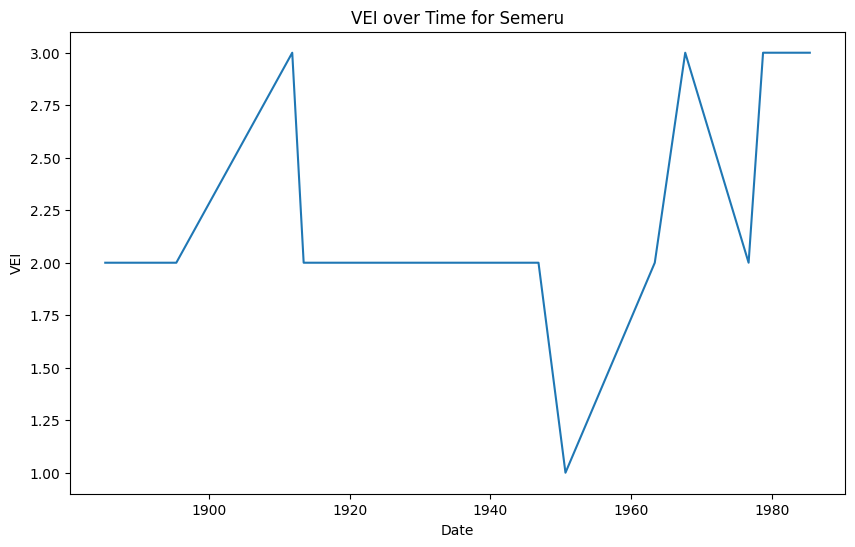

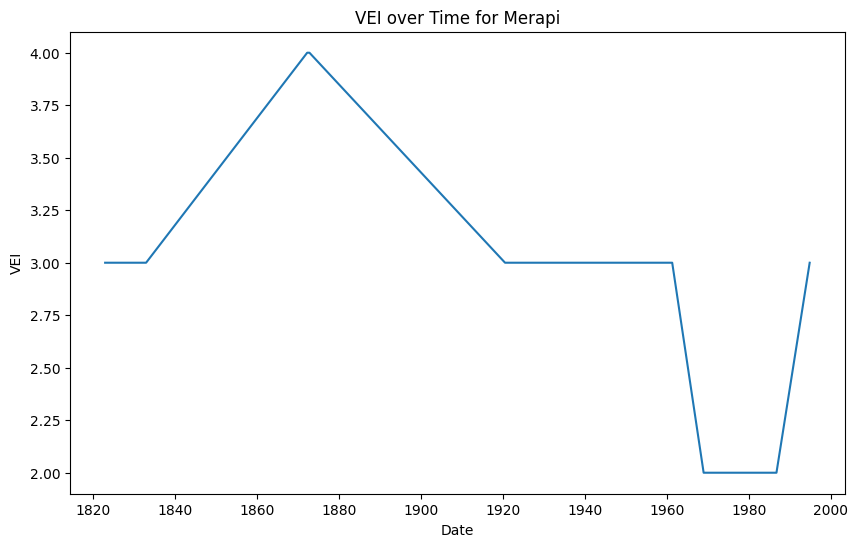

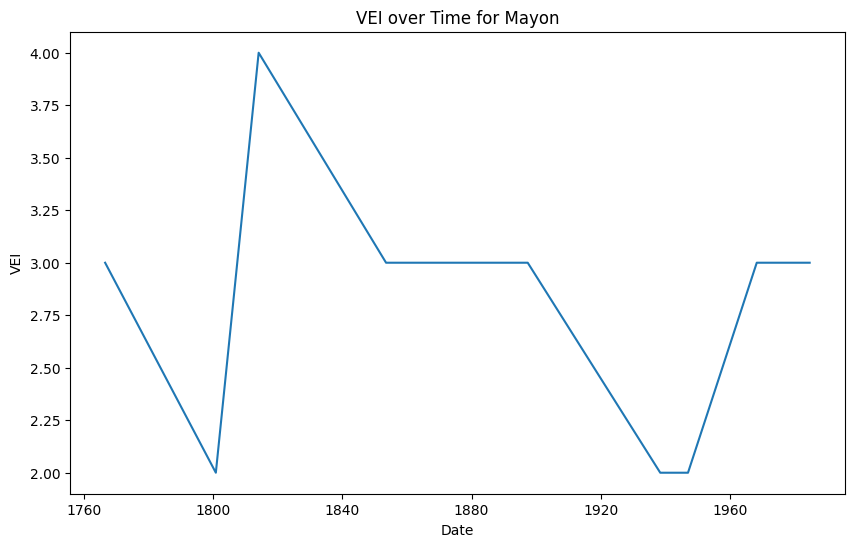

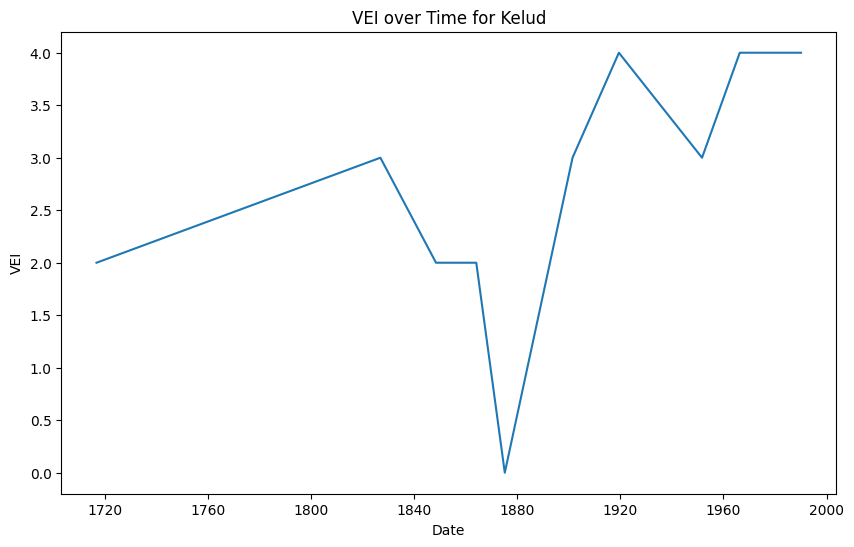

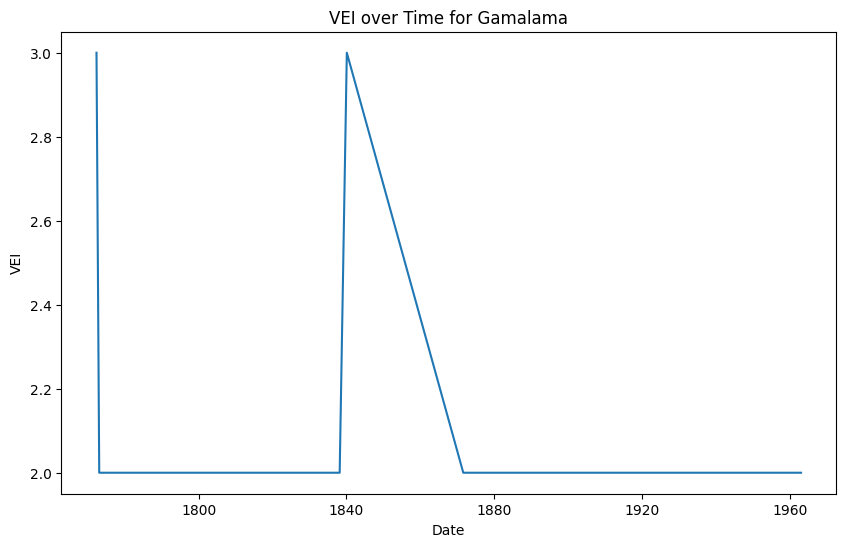

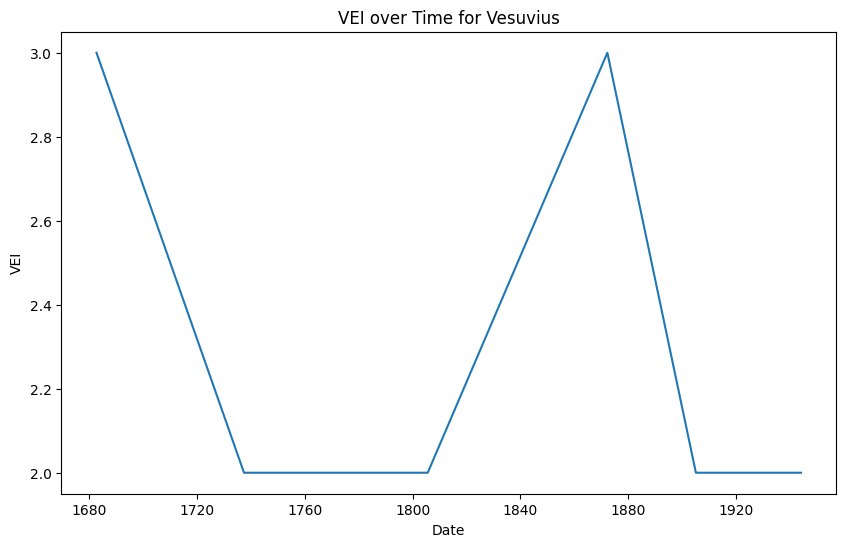

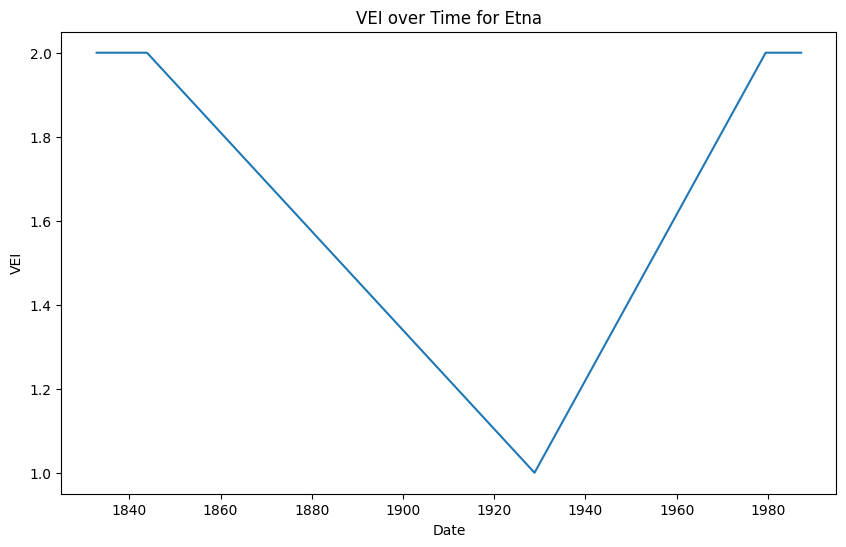

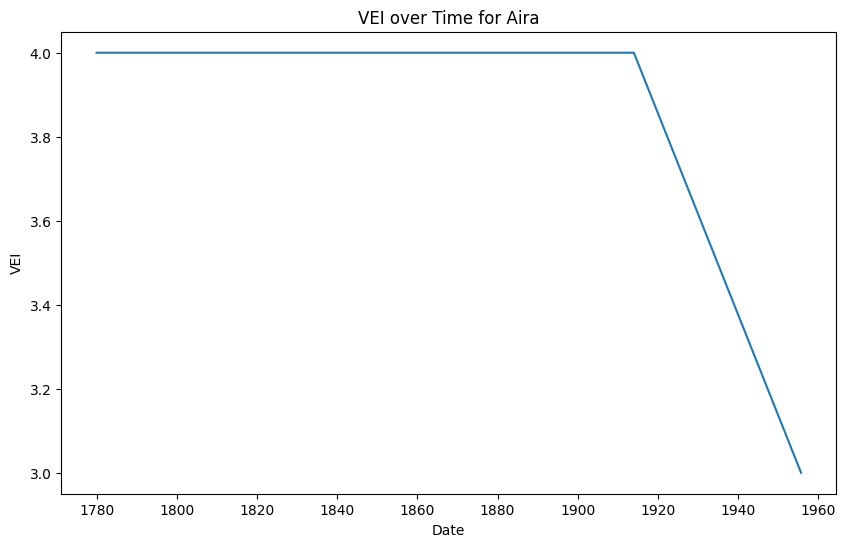

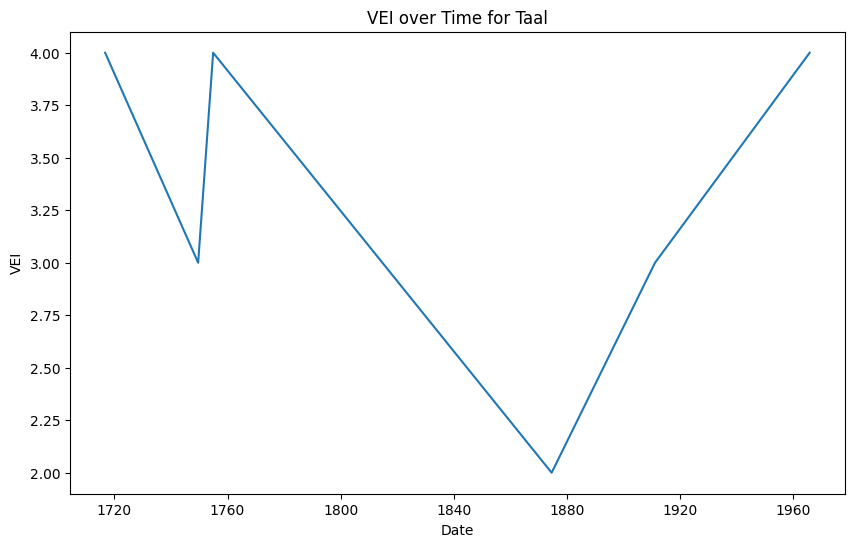

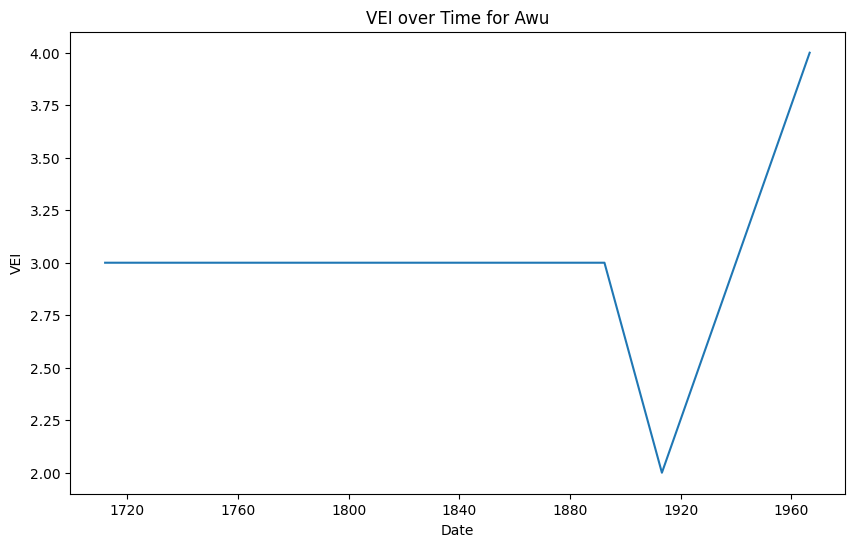

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

volcano_counts = new_df['name'].value_counts()
volcano_names = volcano_counts[volcano_counts > 3].index

for volcano in volcano_names:
    volcano_data = new_df[new_df['name'] == volcano]

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='vei', data=volcano_data)

    plt.title(f'VEI over Time for {volcano}')
    plt.xlabel('Date')
    plt.ylabel('VEI')
    plt.show()

### **Part 3: Fiery Jobs  (15 POINTS TOTAL)**

Proficiency in SQL is also super important. SQL databases are essentially relational databases in which there are vast amounts of tabular data. which can often be used to connect with related tablular data. [This](https://www.w3schools.com/sql/) is a pretty good intro into learning more about SQL.

Check out this [tutorial](https://mode.com/sql-tutorial/introduction-to-sql/) for some clarifications on SQL.

Now! We'll be using **sqlite** to access a database.
* Start by downloading the sql lite file and putting it in the same directory as this [notebook](https://www.kaggle.com/datasets/kaggle/sf-salaries) (hit the 'download' button in the upper right).
* Check out the description of the data so you know the table / column names.

The following code will use sqlite3 to create a database connection. sqlite3 is the library in Python that assists in navigating through SQL databases.

In [15]:
import sqlite3
# import pandas as pd. Pandas was already imported from the previous sections

conn = sqlite3.connect("database.sqlite")
crsr = conn.cursor()

In [17]:
# uploading the data to the server
salary_df = pd.read_csv('Salaries.csv')
salary_df.to_sql('Salaries', conn, if_exists='replace', index=False)

<ipython-input-17-1272095f9690>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  salary_df = pd.read_csv('Salaries.csv')


116475

In [18]:
# This code will let you check out the different tables within the database.
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = crsr.execute(query).fetchall()
print(tables)

[('Salaries',)]


##### **Remember that each problem should be solved with a single sql query.**
**All outputs must be shown**

#### **3.1.1: 2 Points**
***From the Salaries table, get the average base pay for "firefighters" (all job titles consisting of the word "firefighter" (not case sensitive)) between the year 2011 to 2013.***

In [19]:
query = '''SELECT AVG(BasePay)
FROM Salaries
WHERE JobTitle LIKE '%firefighter%'
AND Year BETWEEN 2011 AND 2013
'''
df = pd.read_sql(query, conn)
df

,AVG(BasePay)
0,102839.922666


#### **3.1.2: 2 Points**
***From the Salaries table, create a table for the year 2014, with a job title of "firefighters" (all job titles consisting of the word "firefighter" (not case sensitive)) making under $100,000 as a base pay, and sort in descending order by salary.***

In [20]:
query = '''
SELECT *
FROM Salaries
WHERE JobTitle LIKE '%firefighter%'
AND Year = 2014
AND BasePay < 100000
ORDER BY BasePay DESC
'''
df = pd.read_sql(query, conn)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,113545,Francisco A Ochoa,Firefighter,99442.91,43930.05,15531.45,37894.35,158904.41,196798.76,2014.0,None,San Francisco,FT
1,116445,Stephanie L Mcknight,Firefighter,98704.80,20882.43,11647.77,37479.24,131235.00,168714.24,2014.0,None,San Francisco,FT
2,115057,Destin Rey S Tianero,EMT/Paramedic/Firefighter,98673.65,32213.90,11158.09,38160.50,142045.64,180206.14,2014.0,None,San Francisco,FT
3,114523,Brian K Sullivan,Firefighter,98486.78,35088.28,9824.29,41360.06,143399.35,184759.41,2014.0,None,San Francisco,FT
4,114418,Arthur I Julaton,EMT/Paramedic/Firefighter,98449.85,42528.74,8108.79,36761.62,149087.38,185849.00,2014.0,None,San Francisco,FT
5,113265,Joseph W Egan,Firefighter,98044.24,50275.44,10401.14,41391.22,158720.82,200112.04,2014.0,None,San Francisco,FT
6,112566,Dustin D Stewart,Firefighter,97998.90,53633.37,17284.31,42694.81,168916.58,211611.39,2014.0,None,San Francisco,FT
7,116074,Robi S Tse,Firefighter,97962.40,20132.79,12129.96,41523.59,130225.15,171748.74,2014.0,None,San Francisco,FT
8,113153,Daniel W Murphy,Firefighter,97760.38,55728.15,7557.88,40747.19,161046.41,201793.60,2014.0,None,San Francisco,FT
9,113397,Scott J Mason,Firefighter,97567.20,43217.68,15069.72,42524.19,155854.60,198378.79,2014.0,None,San Francisco,FT


#### **3.1.3: 4 Points**
***Create a dataframe with averages of base pay, averages of benefits, and averages of overtime for "firefighters" (all job titles consisting of the word "firefighter" (not case sensitive)) as well as a column with the sum of these three values.***

***Exclude job titles containing "FIREFIGHTER" (case-sensitive)***

In [21]:
query = '''
SELECT
   AVG(BasePay) AS AverageBasePay,
   AVG(Benefits) AS AverageBenefits,
   AVG(OvertimePay) AS AverageOvertimePay,
   AVG(BasePay) + AVG(Benefits) + AVG(OvertimePay) AS TotalAverageCompensation
FROM Salaries
WHERE JobTitle LIKE '%firefighter%'
AND JobTitle != 'FIREFIGHTER'
'''

df = pd.read_sql(query, conn)
df

,AverageBasePay,AverageBenefits,AverageOvertimePay,TotalAverageCompensation
0,106672.084729,37776.753001,28780.438237,173229.275967


#### **3.1.4: 7 Points**

***Finally, we'll create our own table in our database. Separate the Salaries table by years, and add it back to the database. Using a loop might be helpful.***

* You may use basic python to complete the task. However, using querying on SQL is **mandatory**.
* Feel free to **use multiple lines of code for this problem only.**
* Check out this [Hint](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html)

In [22]:
for year in salary_df['Year'].unique():
    year_df = salary_df[salary_df['Year'] == year]
    year_df.to_sql(f'Salaries_{year}', conn, if_exists='replace', index=False)

In [23]:
# Run this code to check if you successfully added your table.
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Salaries',), ('Salaries_2011.0',), ('Salaries_2012.0',), ('Salaries_2013.0',), ('Salaries_2014.0',), ('Salaries_nan',)]


![volcano](https://as1.ftcdn.net/v2/jpg/06/34/76/64/1000_F_634766457_0fZbpYj6aBLlldO1jADUPpKTRLnNmngs.jpg)

### **Part 4: Be Creative with SQL  (20 POINTS TOTAL)**

For a more interactive SQL experience within a Jupyter notebook or Google Colab, you can use the %sql magic command from the ipython-sql extension. Here's how:

* Install ipython-sql: !pip install ipython-sql
* Load the extension and connect to SQLite:

%load_ext sql

%sql sqlite:///restaurent.db


* Run SQL queries directly in cells using

%%sql

However, you can also continue to import the sqlite3 library and create a connection and cursor to execute SQL commands, as you did before. The choice is up to you.

*** Part 4.1(a)  CREATE A TABLE ***

Create a table called **MyRestaurants** with the following attributes:

* RestaurantName: A VARCHAR field
* FoodType: A VARCHAR field
* DistanceFromHome: An INTEGER field representing the distance (in minutes) from your house
* LastVisitDate: A DATE field representing the date of your last visit
* Liked: A BOOLEAN field indicating whether you like the restaurant or not

In [24]:
sql = '''CREATE TABLE MyRestaurants (
  RestaurantName VARCHAR(255),
  FoodType VARCHAR(255),
  DistanceFromHome INTEGER,
  LastVisitDate DATE,
  Liked BOOLEAN
);
'''
crsr.execute(sql)
conn.commit()

In [25]:
# This code will let you check out the different tables within the database.
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = crsr.execute(query).fetchall()
print(tables)

[('Salaries',), ('Salaries_2011.0',), ('Salaries_2012.0',), ('Salaries_2013.0',), ('Salaries_2014.0',), ('Salaries_nan',), ('MyRestaurants',)]


*** Part 4.1(b) Insert Tuples ***

Insert at least five tuples using the SQL INSERT command, executing it five (or more) times.

* Ensure that you insert ** at least one restaurant that you liked**, **at least one restaurant that you did not like**, and **at least one restaurant where the Liked field is set to NULL**.

In [26]:
sql = '''INSERT INTO MyRestaurants
(RestaurantName, FoodType, DistanceFromHome, LastVisitDate, Liked)
VALUES ('Mc Burgers', 'American', 45, '2024-05-01', 0);'''
crsr.execute(sql)
conn.commit()

In [27]:
sql = '''INSERT INTO MyRestaurants
(RestaurantName, FoodType, DistanceFromHome, LastVisitDate, Liked)
VALUES ('House of Sushis', 'Japanese', 105, '2024-06-10', 1);'''
crsr.execute(sql)
conn.commit()

In [28]:
sql = '''INSERT INTO MyRestaurants
(RestaurantName, FoodType, DistanceFromHome, LastVisitDate, Liked)
VALUES ('Taco Bell', 'Mexican', 920, '2024-07-15', 0);
'''
crsr.execute(sql)
conn.commit()

In [29]:
sql = '''INSERT INTO MyRestaurants
(RestaurantName, FoodType, DistanceFromHome, LastVisitDate, Liked)
VALUES ('Momo King', 'Thai', 425, '2024-08-01', 1);
'''
crsr.execute(sql)
conn.commit()

In [30]:
sql = '''INSERT INTO MyRestaurants
(RestaurantName, FoodType, DistanceFromHome, LastVisitDate, Liked)
VALUES ('Pizza Hut', 'Italian', 110, '2024-09-12', 1);
'''
crsr.execute(sql)
conn.commit()

*** Part 4.1(c) ***

Write a SQL query to return all restaurants in your table.

In [31]:
query = '''SELECT *
FROM MyRestaurants
'''
df = pd.read_sql(query, conn)
df

,RestaurantName,FoodType,DistanceFromHome,LastVisitDate,Liked
0,Mc Burgers,American,45,2024-05-01,0
1,House of Sushis,Japanese,105,2024-06-10,1
2,Taco Bell,Mexican,920,2024-07-15,0
3,Momo King,Thai,425,2024-08-01,1
4,Pizza Hut,Italian,110,2024-09-12,1


*** Part 4.1(d) ***

Now experiment with a few of SQLite's output formats using the SQL query you wrote for question above:

* print the results (Part 4.1(c)) in list form, delimited by " | "

Sample output: Sushi Place | Japanese | 15 | 2024-05-01 | 1

In [32]:
sql = '''SELECT
  RestaurantName || ' | ' ||
  FoodType || ' | ' ||
  DistanceFromHome || ' | ' ||
  LastVisitDate || ' | ' ||
  Liked as temp
FROM MyRestaurants;
'''
df = pd.read_sql(sql, conn)
df

,temp
0,Mc Burgers | American | 45 | 2024-05-01 | 0
1,House of Sushis | Japanese | 105 | 2024-06-10 | 1
2,Taco Bell | Mexican | 920 | 2024-07-15 | 0
3,Momo King | Thai | 425 | 2024-08-01 | 1
4,Pizza Hut | Italian | 110 | 2024-09-12 | 1


*** Part 4.1(d) ***

Modify your SQL query such that it prints "I liked it" or "I hated it" for each restaurant you liked or not.


Note that you are not allowed to modify the table on disk. You should be able to answer this question using only a SELECT statement. A solution that creates and uses an extra table, howerver, will be accepted.

Check: https://www.sqlitetutorial.net/sqlite-case/


In [33]:
sql = '''SELECT
  RestaurantName,
  CASE
    WHEN Liked = 1 THEN 'I liked it'
    WHEN Liked = 0 THEN 'I hated it'
    ELSE 'I have no opinion'
  END AS MyOpinion
FROM MyRestaurants;
'''
df = pd.read_sql(sql, conn)
df

,RestaurantName,MyOpinion
0,Mc Burgers,I hated it
1,House of Sushis,I liked it
2,Taco Bell,I hated it
3,Momo King,I liked it
4,Pizza Hut,I liked it


*** Part 4.1(e) ***

Write a SQL query to return all restaurants that you like but have not visited in the past three months.

In [34]:
sql = '''SELECT RestaurantName
FROM MyRestaurants
WHERE Liked = 1
AND LastVisitDate < date('now', '-3 months');
'''
df = pd.read_sql(sql, conn)
df

,RestaurantName
0,House of Sushis


*** Part 4.2(a) ***

** Next we will focus on INNER JOIN **

Let's add a second table called **"RestaurantReviews"** and demonstrate how to perform an inner join between MyRestaurants and RestaurantReviews.




Create the RestaurantReviews Table
First, we'll create the RestaurantReviews table with the following attributes:

* RestaurantName (to match the Name in MyRestaurants)
* ReviewText (text of the review)
* Rating (integer rating)

In [35]:
sql = '''CREATE TABLE RestaurantReviews (
  RestaurantName VARCHAR(255),
  ReviewText TEXT,
  Rating INTEGER
);
'''
crsr.execute(sql)
conn.commit()

In [36]:
# This code will let you check out the different tables within the database.
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = crsr.execute(query).fetchall()
print(tables)

[('Salaries',), ('Salaries_2011.0',), ('Salaries_2012.0',), ('Salaries_2013.0',), ('Salaries_2014.0',), ('Salaries_nan',), ('MyRestaurants',), ('RestaurantReviews',)]


*** Part 4.2(b) ***

Insert Data into RestaurantReviews
Insert some sample data (at least 5) into this table:


In [37]:
sql = '''
INSERT INTO RestaurantReviews
(RestaurantName, ReviewText, Rating)
VALUES ('House of Sushis', 'The best sushi in town! Fresh and delicious.', 5);
'''
crsr.execute(sql)
conn.commit()

In [38]:
sql = '''INSERT INTO RestaurantReviews
(RestaurantName, ReviewText, Rating)
VALUES ('Mc Burgers', 'Decent burgers, but the fries were cold.', 3);'''
crsr.execute(sql)
conn.commit()

In [39]:
sql = '''
INSERT INTO RestaurantReviews
(RestaurantName, ReviewText, Rating)
VALUES ('Taco Bell', 'Classic Taco Bell - always hits the spot.', 4);
'''
crsr.execute(sql)
conn.commit()

In [40]:
sql = '''
INSERT INTO RestaurantReviews
(RestaurantName, ReviewText, Rating)
VALUES ('Momo King', 'Amazing momos and friendly service.', 5);
'''
crsr.execute(sql)
conn.commit()

In [41]:
sql = '''
INSERT INTO RestaurantReviews
(RestaurantName, ReviewText, Rating)
VALUES ('Pizza Hut', 'Good pizza, but a bit pricey.', 4);
'''
crsr.execute(sql)
conn.commit()

In [42]:
query = '''SELECT *
FROM RestaurantReviews
'''
df = pd.read_sql(query, conn)
df

,RestaurantName,ReviewText,Rating
0,House of Sushis,The best sushi in town! Fresh and delicious.,5
1,Mc Burgers,"Decent burgers, but the fries were cold.",3
2,Taco Bell,Classic Taco Bell - always hits the spot.,4
3,Momo King,Amazing momos and friendly service.,5
4,Pizza Hut,"Good pizza, but a bit pricey.",4


*** Part 4.2(c) Inner Join Query ***
Now perform an inner join between MyRestaurants and RestaurantReviews based on the restaurant name to combine the information from both tables and show the results.

In [43]:
sql = '''
SELECT a.*, b.*
FROM RestaurantReviews as a

INNER JOIN MyRestaurants as b
ON a.RestaurantName = b.RestaurantName;
'''
df = pd.read_sql(sql, conn)
df

,RestaurantName,ReviewText,Rating,RestaurantName,FoodType,DistanceFromHome,LastVisitDate,Liked
0,House of Sushis,The best sushi in town! Fresh and delicious.,5,House of Sushis,Japanese,105,2024-06-10,1
1,Mc Burgers,"Decent burgers, but the fries were cold.",3,Mc Burgers,American,45,2024-05-01,0
2,Taco Bell,Classic Taco Bell - always hits the spot.,4,Taco Bell,Mexican,920,2024-07-15,0
3,Momo King,Amazing momos and friendly service.,5,Momo King,Thai,425,2024-08-01,1
4,Pizza Hut,"Good pizza, but a bit pricey.",4,Pizza Hut,Italian,110,2024-09-12,1


## THE END OF HW 1 ##